#### -----------------------------------------------------------------------------------------------------------------------------------
### NAMA    : Natalie Fuad
### NIM     : 2109106040

####
### POSTTEST 8 - DNN
#### -----------------------------------------------------------------------------------------------------------------------------------

In [230]:
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings

In [117]:
warnings.filterwarnings('ignore')

In [144]:
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential, layers, optimizers
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

# Buatlah model deep learning dengan ketentuan sebagai berikut:
## Teknis:
#### - Dataset tidak boleh sama antar praktikan
#### - Minimal akurasi training 70% dan validation 70%
#### - Gunakan sequential model
#
### Rekomendasi:
#### - Buat model deep learning sederhana
#### - Gunakan dataset yang sudah bersih seperti dari library sklearn, tensorflow atau MNIST dataset
#### -----------------------------------------------------------------------------------------------------------------------------------

## Import Tensorflow Datasets

In [119]:
data, info = tfds.load(name='visual_domain_decathlon',
                      batch_size=-1,
                      with_info=True)

In [170]:
num_label = info.features['label'].num_classes
a, b, c = info.features['image'].shape

In [185]:
print("-------------------\n")
print(" num_label : ", num_label,
      "\n a         : ", a,
      "\n b         : ", b,
      "\n c         : ", c)
print("\n-------------------")

-------------------

 num_label :  100 
 a         :  None 
 b         :  None 
 c         :  3

-------------------


## Menggambil/membuat data training & data testing set dari dataset

In [173]:
dtTrain = data['train']
dataX_train, dataY_train = dtTrain['image'], dtTrain['label']

dtTest = data['test']
dataX_test, dataY_test = dtTest['image'], dtTest['label']

## one-hot encoding keras.utils

In [162]:
num_classes = 100
y_train = keras.utils.to_categorical(dataY_train, num_classes)
y_test = keras.utils.to_categorical(dataY_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [187]:
print("---------------------------------------\n")
print(" x_train shape :", dataX_train.shape)
print(" Y_train shape :", dataY_train.shape)
print(" x_test shape :", dataX_test.shape)
print(" Y_test shape :", dataY_test.shape)
print("\n---------------------------------------")

---------------------------------------

 x_train shape : (3334, 73, 141, 3)
 Y_train shape : (3334,)
 x_test shape : (3333, 73, 168, 3)
 Y_test shape : (3333,)

---------------------------------------


## Menampilkan sampel dataset

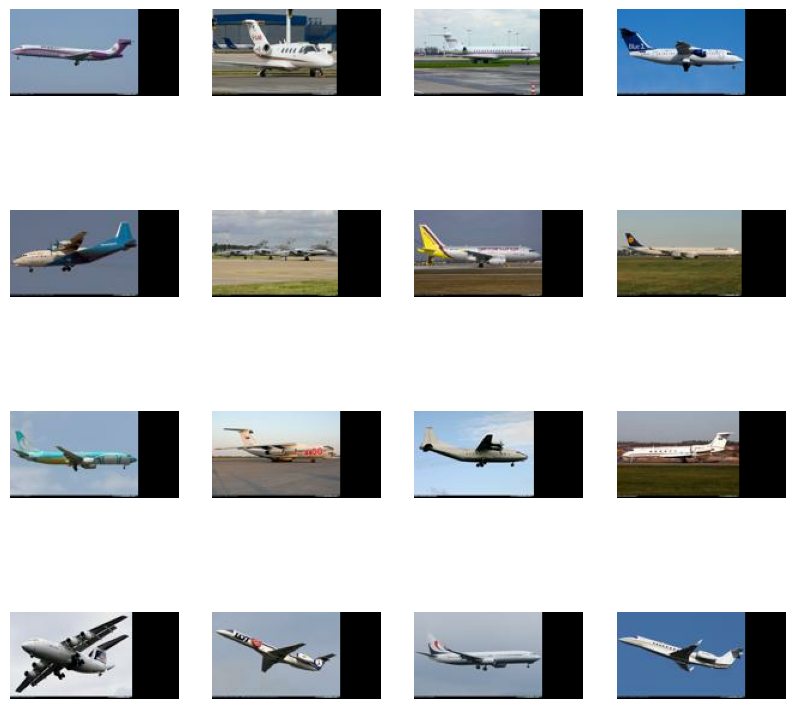

In [124]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(dataX_train[i])
    plt.axis("off")
    
plt.show()

## reshape & normalisasi pixel gambar

In [231]:
x_train = dataX_train.reshape(3334, 30879)
x_test = dataX_test.reshape(3333, 30879)

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()
      

In [234]:
x_train = dataX_train.astype('float32')/255
x_test = dataX_test.astype('float32')/255

AttributeError: EagerTensor object has no attribute 'astype'. 
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()
      

## Membuat model sequential

In [239]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=30879))
model.add(Dense(246, activation='relu'))
model.add(Dense(138, activation='relu'))
model.add(Dense(jmlh_class, activation='softmax'))

In [240]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 512)               15810560  
                                                                 
 dense_60 (Dense)            (None, 246)               126198    
                                                                 
 dense_61 (Dense)            (None, 138)               34086     
                                                                 
 dense_62 (Dense)            (None, 100)               13900     
                                                                 
Total params: 15,984,744
Trainable params: 15,984,744
Non-trainable params: 0
_________________________________________________________________


In [241]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = Optimizer,
              metrics = ['accuracy'])

## Trainig model menggunakan batch_size 138

In [242]:
fitmodel = model.fit(x_train,
          y_train,
          batch_size=138,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100


ValueError: in user code:

    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 30879), found shape=(None, 73, 141, 3)


In [243]:
fitmodel.history.keys()

NameError: name 'fitmodel' is not defined

NameError: name 'fitmodel' is not defined

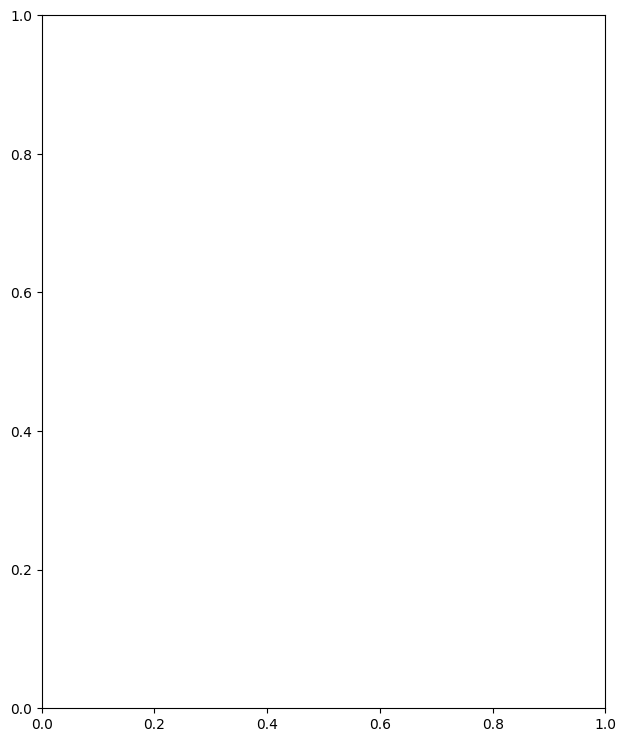

In [244]:
plt.figure(figsize=(16,9))

ecpochs_run = [i+1 for i in range(10)]

plt.subplot(1,2,1)
plt.plot(ecpochs_run, fitmodel.history['accuracy'], label = 'Training')
plt.plot(ecpochs_run, fitmodel.history['val_accuracy'], label = 'Testing')
plt.title("Akurasi")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ecpochs_run, fitmodel.history['loss'], label = 'Training')
plt.plot(ecpochs_run, fitmodel.history['val_loss'], label = 'Testing')
plt.title("Loss")
plt.legend()

## Evaluasi model

In [246]:
model.evaluate(x_test, y_test, verbose=0)
print("LOSS: ", score[0])
print("AKURASI: ", score[1])

ValueError: in user code:

    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 30879), found shape=(None, 73, 168, 3)
